<a href="https://colab.research.google.com/github/tomektomeknyc/machinelearning/blob/main/Arima2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.2 MB/s eta 0:00:00


In [4]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2023-07-18 11:17:40--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2023-07-18 11:17:40 (30.9 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [5]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [6]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df['LogPassengers'] = np.log(df['Passengers'])

In [8]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [9]:
import pmdarima as pm

In [10]:
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=6.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.87 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.90 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.23 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.86 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.45 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.74 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.34 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.66 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.17 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.50 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Tue, 18 Jul 2023   AIC                            905.686
Time:                                    11:20:23   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

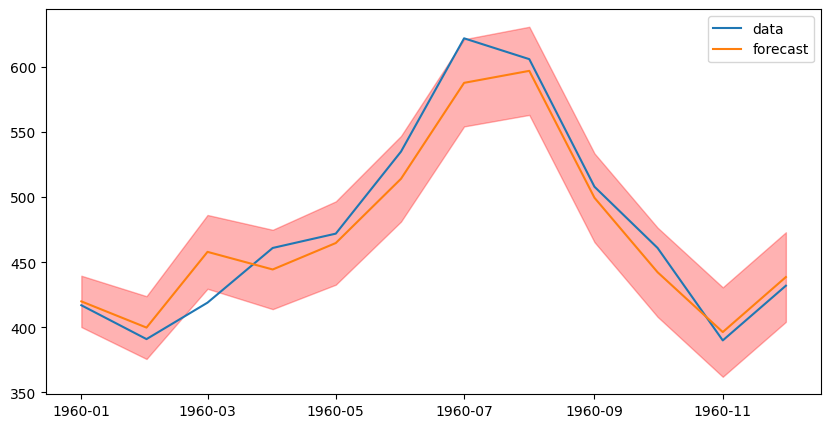

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();


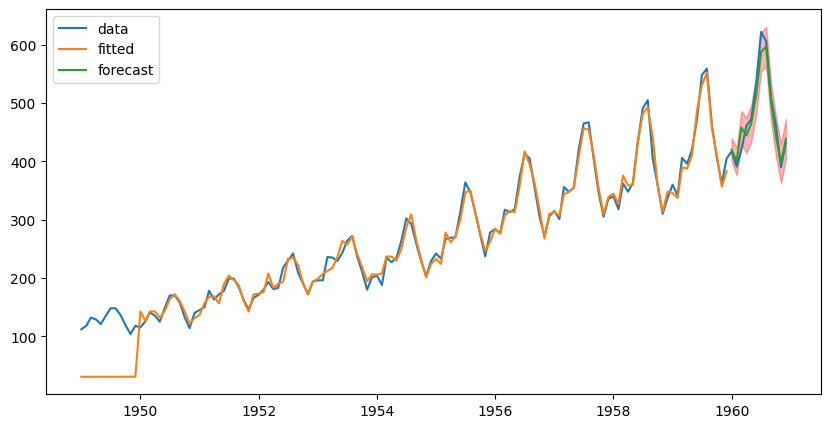

In [15]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [17]:
logmodel = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-439.293, Time=2.91 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=2.78 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.93 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.04 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=2.04 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=1.00 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.328, Time=4.93 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.714, Time=3.65 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=6.02 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.571, Time=2.07 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.51 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-443.041, Time=2.51 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.327, Time=5.77 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [18]:
logmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Tue, 18 Jul 2023   AIC                           -448.052
Time:                                      11:28:46   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0194      0.009      2.164      0.030       0.002       0.037
ar.L1          0.5992      0.083      7.251      0.000       0.437       0.761
ar.L2          0.2418      0.085      2.854      0.004       0.076       0.408
ma.S.L12      -0.5670      0.105     -5.413      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.188      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.13
Prob(Q):                              0.99   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

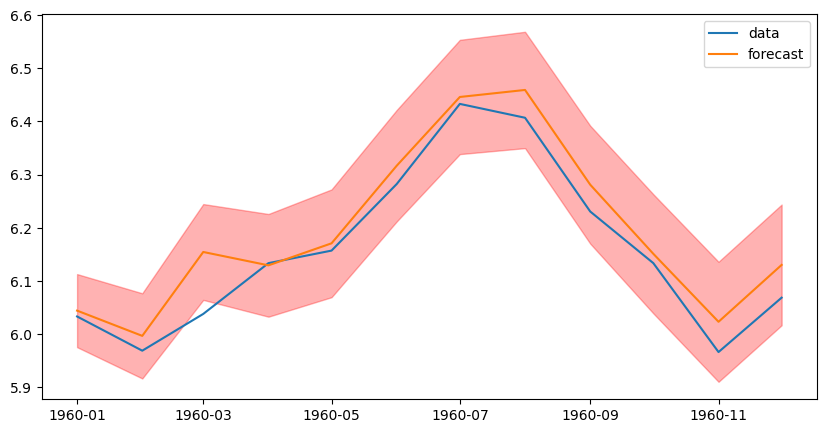

In [19]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();


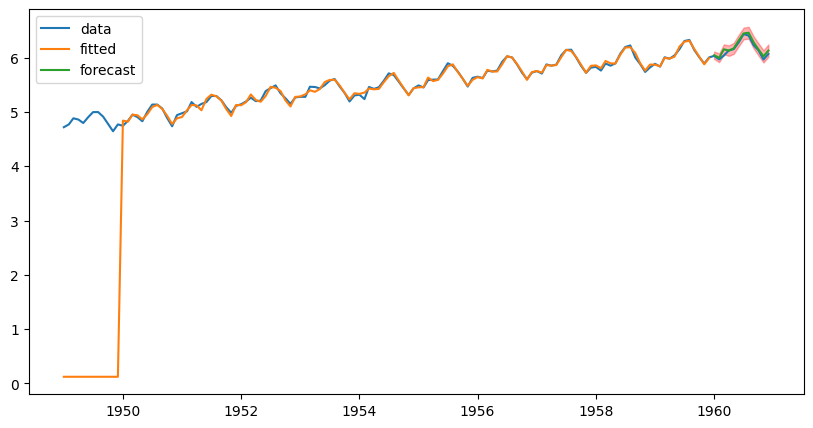

In [20]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [21]:
### forecast RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))


In [22]:
print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.536468798006823
Logged RMSE: 23.06076576973839


In [23]:
### non-seasonal
model = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      d=0,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=826.758, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-209.510, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-211.836, Time=0.47 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-213.706, Time=0.63 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-207.912, Time=0.55 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-211.982, Time=0.53 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-211.226, Time=0.53 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 0, 2)   Log Likelihood                 167.356
Date:                Tue, 18 Jul 2023   AIC                           -304.712
Time:                        11:34:53   BIC                           -261.470
Sample:                    01-01-1949   HQIC                          -287.141
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0440      0.082      0.536      0.592      -0.117       0.205
ar.L2          0.1866      0.097      1.931      0.053      -0.003       0.376
ar.L3          0.1003      0.098      1.022      0.307      -0.092       0.293
ar.L4         -0.0946      0.079     -1.197      0.231      -0.249       0.060
ar.L5          0.0462      0.078      0.592      0.554      -0.107       0.199
ar.L6          0.0649      0.079      0.817      0.414      -0.091       0.221
ar.L7         -0.0442      0.084     -0.528      0.598      -0.208       0.120
ar.L8         -0.1073      0.084     -1.274      0.203      -0.272       0.058
ar.L9          0.0066      0.081      0.082      0.935      -0.151       0.165
ar.L10         0.0999      0.076      1.313      0.189      -0.049       0.249
ar.L11        -0.0795      0.081     -0.988      0.323      -0.237       0.078
ar.L12         0.7769      0.080      9.699      0.000       0.620       0.934
ma.L1          0.9582      0.098      9.766      0.000       0.766       1.151
ma.L2          0.6238      0.084      7.448      0.000       0.460       0.788
sigma2         0.0039      0.001      6.718      0.000       0.003       0.005
===================================================================================
Ljung-Box (L1) (Q):                   4.06   Jarque-Bera (JB):                 1.05
Prob(Q):                              0.04   Prob(JB):                         0.59
Heteroskedasticity (H):               0.50   Skew:                             0.22
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

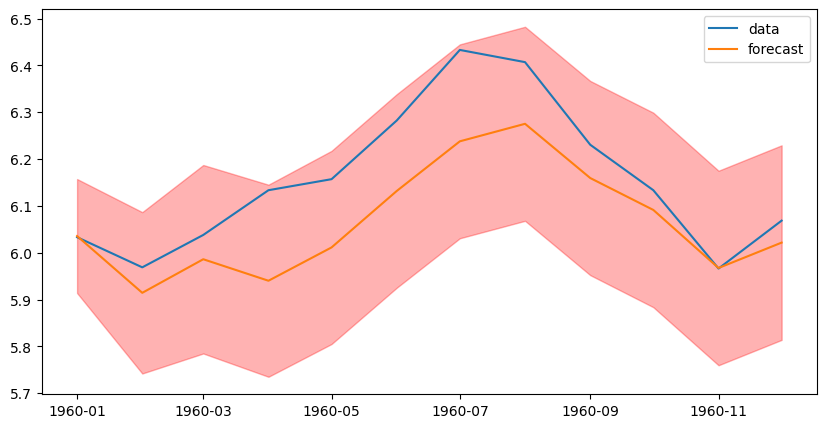

In [25]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

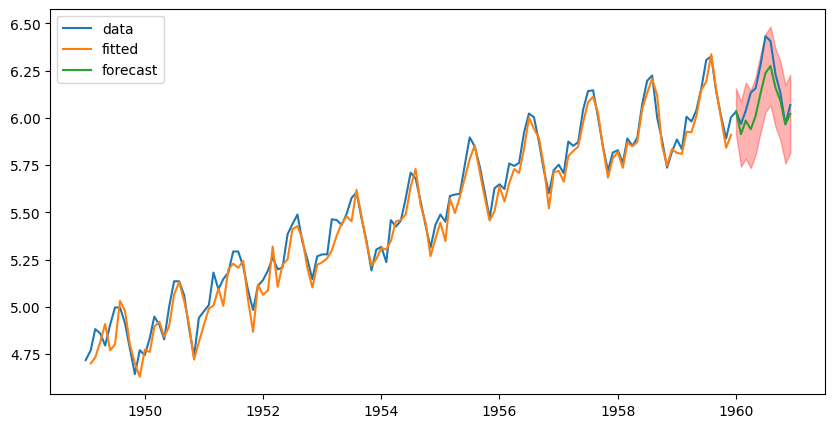

In [26]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [27]:
rmse(test['Passengers'], np.exp(test_pred))

55.413088949763505

In [28]:
### non-seasonal non-logged
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1261.216, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1254.439, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1245.588, Time=0.58 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 2)   Log Likelihood                -494.031
Date:                Tue, 18 Jul 2023   AIC                           1020.063
Time:                        12:00:29   BIC                           1066.066
Sample:                    01-01-1949   HQIC                          1038.756
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1064      3.022      2.021      0.043       0.184      12.029
ar.L1         -0.0767      0.143     -0.537      0.591      -0.357       0.203
ar.L2         -0.2991      0.142     -2.112      0.035      -0.577      -0.022
ar.L3         -0.1343      0.117     -1.151      0.250      -0.363       0.094
ar.L4         -0.2842      0.115     -2.481      0.013      -0.509      -0.060
ar.L5         -0.0921      0.116     -0.792      0.428      -0.320       0.136
ar.L6         -0.3052      0.112     -2.715      0.007      -0.525      -0.085
ar.L7         -0.1007      0.124     -0.815      0.415      -0.343       0.142
ar.L8         -0.3146      0.120     -2.623      0.009      -0.550      -0.080
ar.L9         -0.0836      0.120     -0.696      0.486      -0.319       0.152
ar.L10        -0.3177      0.129     -2.469      0.014      -0.570      -0.066
ar.L11        -0.0757      0.130     -0.584      0.559      -0.330       0.178
ar.L12         0.6368      0.126      5.062      0.000       0.390       0.883
ma.L1         -0.0959      0.157     -0.610      0.542      -0.404       0.212
ma.L2          0.2343      0.185      1.265      0.206      -0.129       0.597
sigma2        97.8952     15.343      6.381      0.000      67.824     127.966
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                13.01
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.19
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

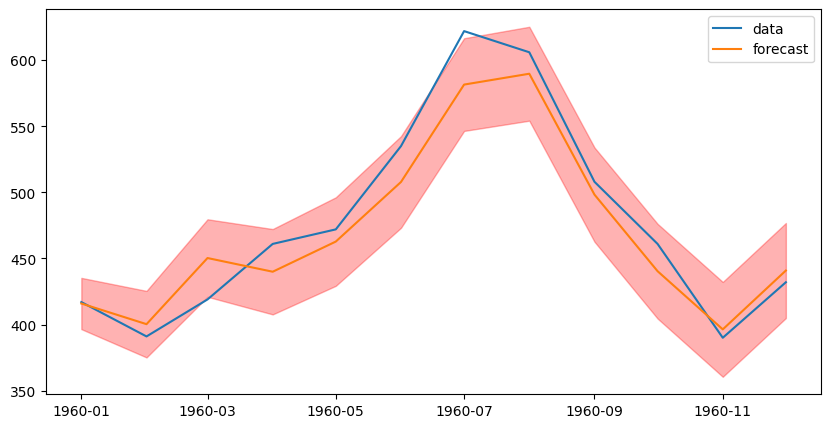

In [30]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [31]:

rmse(test['Passengers'], test_pred)

20.148083840597806